In [40]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from v4l2py import Device
import time
# !pip install v4l2py

In [2]:
# U0 Y0 V0 Y1 U2 Y2 V2 Y3 U4 Y4 V4…
# 640*480*3/2 + (640*480*1/2)


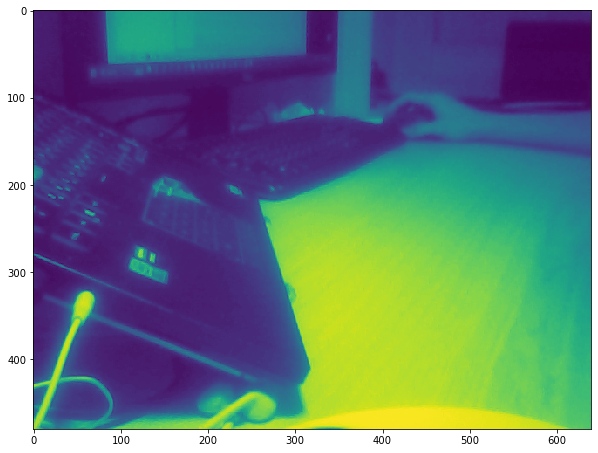

In [84]:
def yuv2rgb(d):
    Y, U, V = d
    R = Y + 1.140*V
    G = Y - 0.395*U - 0.581*V
    B = Y + 2.032*U
    return [R, G, B]


def convert(frame):
    
    out = []
    
    for i in range(0, len(frame), 4):
        data = frame[i:i+4]
#         Y0 = data[0]
#         U0 = data[1]
#         V0 = data[2]
#         Y1 = data[3]
#         U1 = U0
#         V1 = V0

        Y0 = data[0]
        V0 = data[1]
        U0 = data[2]
        Y1 = data[3]
        V1 = V0
        U1 = U0
        

        
        out.extend(yuv2rgb([Y0, U0, V0]))
        out.extend(yuv2rgb([Y1, U1, V1]))
        
    return np.array(out)


def get_frame():
    with Device.from_id(0) as cam:
        for i, frame in enumerate(cam):
            if i > 0: break

            frame = np.array(frame)
            return frame

frame = get_frame()
        

# frame = convert(frame)

        
plt.figure(figsize=(10, 15))
plt.imshow(np.reshape(frame[0::2], (480,640)))         

In [76]:
np.save("FrameYUV422.npy", frame)

In [ ]:
plt.figure(figsize=(10, 15))
# plt.imshow(np.reshape(frame[0::3], (480,640))) 
plt.imshow(np.reshape(frame[0::2], (480,640))) 

In [36]:
R = Y + 1.140*V
G = Y - 0.395*U - 0.581*V
B = Y + 2.032*U

614400.0

In [65]:
a  =[1,2,3]
c, v, b = a
c, v, b

(1, 2, 3)

In [68]:
len(frame[::3])

307200

In [26]:
frame=0
with Device.from_id(0) as cam:
    for i, f in enumerate(cam):
        print(f"frame #{i}: {len(f)} bytes")
        frame = f
        break
frame = np.array(frame)

frame #0: 614400 bytes


In [ ]:
frame = frame[::2]

In [37]:
len(frame[1::2])

307200

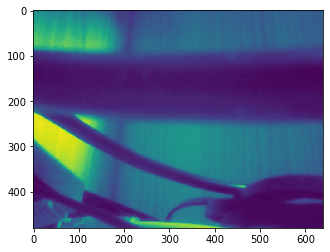

In [39]:

Y = frame[0::2]
Y = np.reshape(Y, (480,640))


plt.imshow(Y)

In [31]:

def YUVtoRGB(byteArray):

#     e = 1280*720
    e = 640*480
    Y = byteArray[0:e]
#     Y = np.reshape(Y, (720,1280))
    Y = np.reshape(Y, (480,640))

    s = e
    V = byteArray[s::2]
    V = np.repeat(V, 2, 0)
#     V = np.reshape(V, (360,1280))
    V = np.reshape(V, (480,640))
    V = np.repeat(V, 2, 0)

    U = byteArray[s+1::2]
    U = np.repeat(U, 2, 0)
#     U = np.reshape(U, (360,1280))
    U = np.reshape(U, (480,640))
    U = np.repeat(U, 2, 0)

    RGBMatrix = (np.dstack([Y,U,V])).astype(np.uint8)
    RGBMatrix = cv2.cvtColor(RGBMatrix, cv2.COLOR_YUV2RGB, 3)
    return RGBMatrix

YUVtoRGB(frame)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 480 and the array at index 1 has size 960

In [28]:
e = 640*480
s = e
frame[s::2]

array([217, 206, 205, ...,  21,  21,  21])

In [29]:

a= np.array([1,2,3,4])
a[4::2]

array([], dtype=int32)

In [4]:
from v4l2py.device import Device, BufferType
cam = Device.from_id(0)
cam.open()
cam.info.card

'USB 2.0 PC Cam'

In [5]:
cam.info.capabilities

<Capability.DEVICE_CAPS|STREAMING|META_CAPTURE|EXT_PIX_FORMAT|VIDEO_CAPTURE: 2225078273>

In [6]:
cam.info.formats

[ImageFormat(type=<BufferType.VIDEO_CAPTURE: 1>, description='YUYV 4:2:2', flags=<ImageFormatFlag.0: 0>, pixel_format=<PixelFormat.YUYV: 1448695129>)]

In [7]:
cam.get_format(BufferType.VIDEO_CAPTURE)

Format(width=640, height=480, pixel_format=<PixelFormat.YUYV: 1448695129>)

In [8]:
for ctrl in cam.controls.values(): print(ctrl)

<Control brightness type=integer min=0 max=255 step=1 default=120 value=120>
<Control contrast type=integer min=0 max=127 step=1 default=28 value=28>
<Control saturation type=integer min=0 max=127 step=1 default=30 value=30>
<Control hue type=integer min=-15 max=15 step=1 default=0 value=0>
<Control white_balance_temperature_auto type=boolean default=1 value=1>
<Control gamma type=integer min=1 max=4 step=1 default=2 value=2>
<Control power_line_frequency type=menu min=0 max=2 step=1 default=1 value=1>
<Control white_balance_temperature type=integer min=2800 max=6500 step=1 default=5000 value=5000 flags=inactive>
<Control sharpness type=integer min=0 max=6 step=1 default=1 value=1>
<Control backlight_compensation type=integer min=0 max=2 step=1 default=1 value=1>
<Control exposure_auto type=menu min=0 max=3 step=1 default=3 value=3>
<Control exposure_absolute type=integer min=625 max=5000 step=1 default=2500 value=2500 flags=inactive>
<Control exposure_auto_priority type=boolean defaul

In [9]:
import cv2 as cv2  